# Logistic regression

Am învățat cum putem să folosim Linear Regression (și variațiile acesteia Lasso, Ridge, ElasticNet) pentru a face predicții la un label ce conține valori numerice continue. Întrebarea care vine acuma este cum putem să facem predicții pentru un label categoric? Aici intră în calcul partea de Logistic regression. De reținut faptul că pe parcursul acestui curs o să ne uităm peste mai multe modele care pot face predicții pentru labels de tip continu sau categoric (nu o să fie doar Linear Regression și Logistic regression). De asemenea să nu ne inducă în eroare denumirea de Regression din Logistic Regression, deoarece acesta este un model de Machine Learning de clasificare care are scopul de a prezice categorii pentru labels.

În prima parte o să vedem cum anume putem modifica algorimtul de Linear Regression în cel de Logistic regression utilizând ceea ce portă denumirea de sigmoid function (logistic function). Urmează partea în care o să discutăm despre teoria matematică ce stă în spatele Logistic Regression și despre cum putem rezolva problema de Gradient Descent. După ce se implementează un model de Logistic Regression urmează partea de evaluare care diferită față de evaluarea unui model de Linear Regression. O să încheiem secțiunea cu partea de Multiclass Classification și cu un proiect

Un astfel de model de Logistic Regression ne permite să facem predicții pe un label de tip categorical bazat pe date anterioare (pe baza cărora se antrenează). Acel label care se prezice poate avea două sau mai multe valori. Un model de clasificare de cele mai multe ori returnează o probabilitate a unei instanțe să aparțină la o anumită clasă. De exemplu, dacă avem un label cu 3 valori de prezis (0, 1 și 2) atunci pentru o anumită instanță există o probabilitate de 10% să facă parte din clasa 0, o probabilitate de 85% să facă parte din clasa 1 și o probabilitate de 5% să facă parte din clasa 2. Probabilitatea de 85% fiind cea mai mare, la final modelul prezice că acea instanță face parte din clasa 1

Logistic regression funcționează prin transformarea modelului de Linear Regression într-un model de clasificare prin folosirea unei funcții care poartă denumirea de logistic function. Să luăm exemplul următor.

In [6]:
data = {'Income': [-5, -4, -2, -1, 0, 2, 3, 4, 5], 'Loan Paid' : [0, 0, 0, 0, 0, 1, 1, 1, 1]}

In [7]:
import pandas as pd
df = pd.DataFrame(data)

In [8]:
df

,Income,Loan Paid
0,-5,0
1,-4,0
2,-2,0
3,-1,0
4,0,0
5,2,1
6,3,1
7,4,1
8,5,1


Ce anume reprezintă datele respective? Datele din coloana de income reprezintă sursa de venit a unei persoane, iar coloana de Loan Paid ne spune dacă acea persoană a reușit să își plătească datoriile. 0 înseamnă că nu a reușit să își plătească datoriile, iar 1 înseamnă că a reușit acest lucru. Se poate observa că există o legătură între aceste date, persoanele care au o sursă de venit pozitivă și-au plătit datoriile, iar cele care au negativă nu au reușit să își plătească datoriile.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Income', ylabel='Loan Paid'>

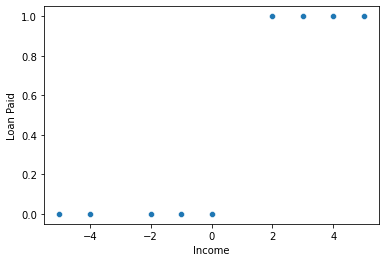

In [10]:
sns.scatterplot(x='Income', y='Loan Paid', data=df)

Dacă creem un scatter plot pentru datele respective, atunci fiecare scatter plot o să arate așa, indiferent de ce valori avem pe coloana 'Income'. Din moment ce valorile din coloana Loan Paid sunt doar 0 sau 1, atunci graficul respectiv o să arate tot timpul ca și cel de sus. Dacă am dori să facem o predicție în funcție de o anumită valoare ce o are o persoană la Income, pentru asta nu putem să utilizăm o regresie liniară. Dacă vrem să utilizăm o regresie liniară aici o să avem prea multe valori care o să fie considerate ca și outliers. O să fie o gamă variată de valori pentru x pe care să se antreneze un model, însă pentru y o să avem doar două valori 0 și 1. Știind că o regresie liniară face predicții pentru valori continue, ce se întâmplă cu valorile de exemplu de 0.2 (deoarece la final trebuie să avem valori doar de 0 sau 1)

Ce putem face în acest caz este să ne utilizăm de acea funcție logistic function pentru a realiza o anumită conversie de la linear regression la logistic regression

<img src='../SS/logistic_regression.png' width="500" height="340">

Acum o să avem un plot care o să arate ca și imaginea de mai sus. În continuare o să tratăm y-ul acestui grafic ca și o probabilitate de a aparține unei clase anume. Valoarea de la y este cuprinsă între 0 și 1 și o să zicem că în mod normal jumătatea acestei valori este punctul de cotitură. Dacă o valoare este mai mare de 0.5, atunci valoarea predicției o să fie 1, iar dacă valoarea este mai mică de 0.5, atunci o să fie trecută în clasa 0. Dacă împărțim axa y în două (la valoarea de 0.5) atunci o să tratăm această axă ca și o probabilitate și o să zicem că probabilitatea ca o valoare să aparțină unei anumite clase este dată de poziția unde anume pe acea linie cade acea valoare prezisă.

De exemplu, dacă o să avem o nouă persoană care are valoarea 1 la Income, atunci pe axa y acea valoare o să cadă undeva la 0.9 ceea ce înseamnă că există o probabilitate de 90% ca acea valoare să facă parte din clasa 1 și o probabilitate de 0.10% ca valoarea să facă parte din clasa 0